In [11]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import glob
from google.cloud import vision
from pytesseract import Output
from pytesseract import pytesseract as pt
from PIL import Image, ImageDraw
from glob import glob

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

ImportError: cannot import name 'vision' from 'google.cloud' (unknown location)

In [10]:
pip install google

                                              0.0/45.3 kB ? eta -:--:--
     ---------------------------------------- 45.3/45.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 현재 작업 디렉토리에서 "/images/" 폴더 내의 모든 jpg 파일을 가져옵니다.
image_path = os.getcwd() + "/images/*.jpg"

# glob.glob를 사용하여 모든 jpg 파일의 이름을 가져옵니다.
image_files = glob.glob(image_path)

# 각 이미지를 keras_ocr.tools.read를 사용하여 읽어옵니다.
images = [keras_ocr.tools.read(img_file) for img_file in image_files]

# 이미지별로 텍스트 인식을 수행합니다.
prediction_groups = [pipeline.recognize([img]) for img in images]

2/2 [==============================] - 5s 1s/step


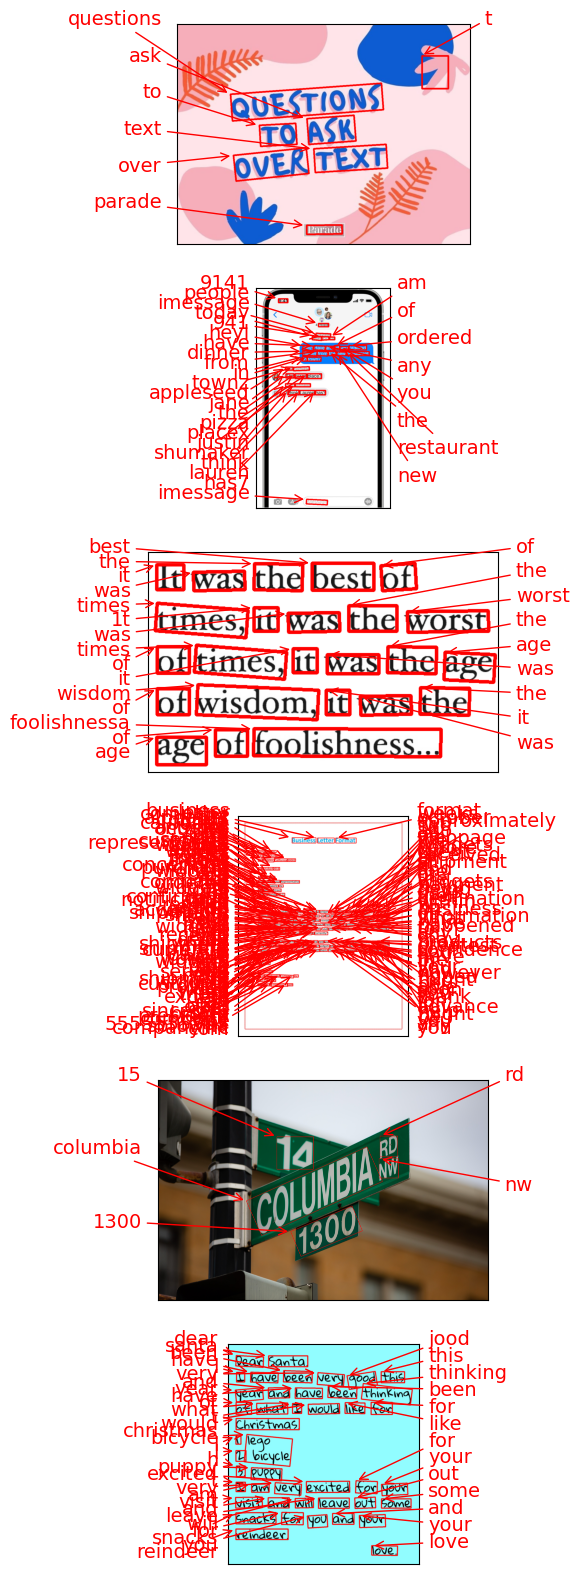

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [4]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image

In [5]:
def detect_text(path):
    """Detects text in the file."""
    text_dec = []
    bounds = []
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    s = os.path.splitext(path)
    s = os.path.split(s[0])
    name = s[1]
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        text_dec.append(text.description.replace('\n',''))
        vertices = text.bounding_poly
        bounds.append(vertices)
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return name, text_dec, bounds